In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%matplotlib inline

In [2]:
df=pd.read_csv('train.csv',nrows=5000)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(5000, 785)

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 2913 to 2732
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 24.0 MB


In [6]:
train.shape

(4000, 785)

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2913,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
775,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Splitting the data into features and target
train_X = train[train.columns[1:]]
train_y = train['label']

test_X = test[test.columns[1:]]
test_y = test['label']

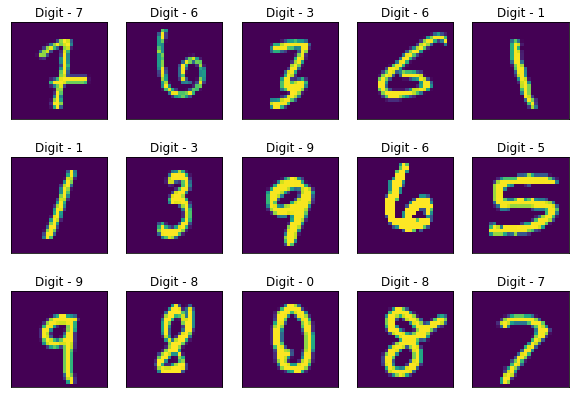

In [9]:
fig, ax = plt.subplots(3,5, figsize=(10,7), subplot_kw={'xticks':(), 'yticks': ()})
ax = ax.ravel()
for i in range(15):
    pixels = train_X.iloc[i].values.reshape(-1,28)
    ax[i].imshow(pixels, cmap='viridis')
    ax[i].set_title("Digit - " + str(train_y.iloc[i]))

In [10]:
train_X_scaled = train_X/255
test_X_scaled = test_X/255

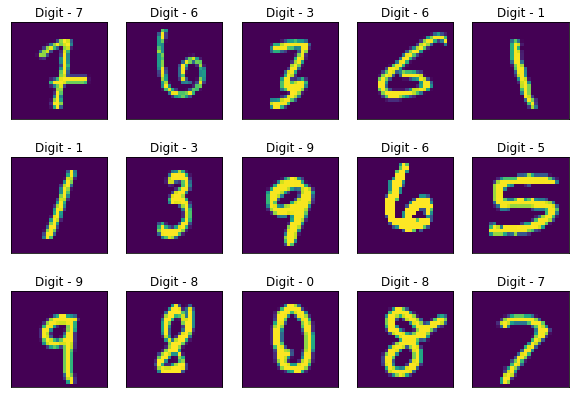

In [11]:
#Lets plot again to see if scaling affected the acutal images

fig, ax = plt.subplots(3,5, figsize=(10,7), subplot_kw={'xticks':(), 'yticks': ()})
ax = ax.ravel()
for i in range(15):
    pixels = train_X_scaled.iloc[i].values.reshape(-1,28)
    ax[i].imshow(pixels, cmap='viridis')
    ax[i].set_title("Digit - " + str(train_y.iloc[i]))

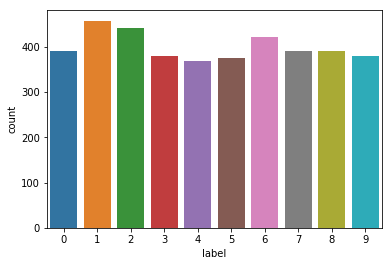

In [12]:
sns.countplot(train_y)

PCA

First we will try the simplest Dimensionality Reduction Technique Which is PCA
Basically what PCA does is change of basis,and basis for the same are made up of eigenvectors of the co-variance 
matrix of X.And their corresponding eigenvalues represent the amount of information(variance)

covariance matrix ( measure of how related 2 variables are to each other ) in our new subspace, the off-diagonal
values(off-diagonal values represent redundancy) of the covariance matrix will be zero and only the diagonals 
( or eigenvalues) will be non-zero. It is these diagonal values that represent the variances of the principal 
components that we are talking about or information about the variability of our features.

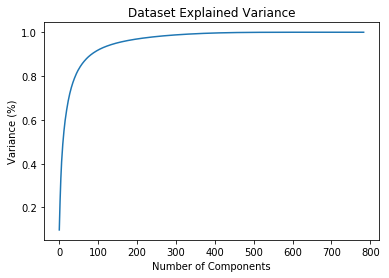

In [13]:
pca = PCA().fit(train_X_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

As we can see we have total 784 dimensions in original data,but 150 dimensions are sufficient to explain around 90%  of the total variance when we use pca for projecting the data onto lower dimension

In [14]:
n_components = 30
pca = PCA(n_components=n_components).fit(train_X_scaled)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
#eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_

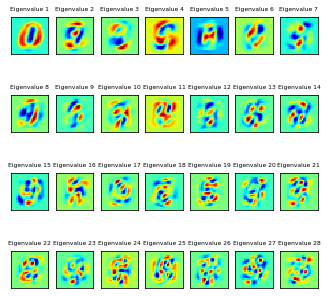

In [15]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(5.5,5.5))
for i in list(range(n_row * n_col)):
#     for offset in [10, 30,0]:
#     plt.subplot(n_row, n_col, i + 1)
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6)
    plt.xticks(())
    plt.yticks(())
plt.show()


 Compare the first component "Eigenvalue 1" to the 28rd component "Eigenvalue 28" and it is obvious that more complicated directions or components are being generated in the search to maximise variance in the new feature subspace.

In [16]:
#Reducing dimension into 2 components
pca = PCA(n_components=2, random_state=0, whiten=True)
pca.fit(train_X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=True)

In [17]:
#transform the train and test data using the above 2 components
train_X_pca = pca.transform(train_X_scaled)
test_X_pca = pca.transform(test_X_scaled)

Text(0, 0.5, 'Componene 2')

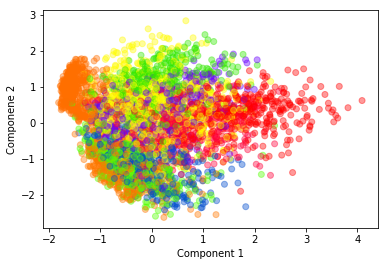

In [18]:
#plot the components
plt.scatter(train_X_pca[:,0], train_X_pca[:,1], c=train_y.values,  cmap='prism', alpha=0.4)
plt.xlabel('Component 1')
plt.ylabel('Componene 2')

#As we can see PCA did not do a good job in classification with 2 components,
#most of the data points are overlapping each other.

2. Linear Discriminant Analysis (LDA)
LDA, much like PCA is also a linear transformation method commonly used in dimensionality reduction tasks. However unlike the latter which is an unsupervised learning algorithm, LDA falls into the class of supervised learning methods. As such the goal of LDA is that with available information about class labels, LDA will seek to maximise the separation between the different classes by computing the component axes (linear discriminants ) which does this.

In [19]:
lda = LDA(n_components=2)
X_LDA_2D = lda.fit_transform(train_X_pca, train_y.values )

Text(0, 0.5, 'Componene 2')

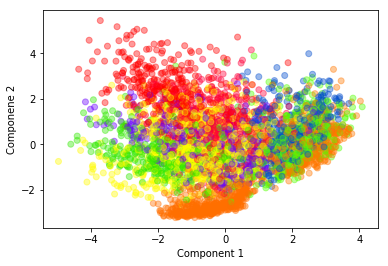

In [20]:
plt.scatter(X_LDA_2D[:,0], X_LDA_2D[:,1], c=train_y.values,  cmap='prism', alpha=0.4)
plt.xlabel('Component 1')
plt.ylabel('Componene 2')

From the scatter plot above, we can see that the data points are more clearly clustered when using LDA with as compared to implementing PCA with class labels. This is an inherent advantage in having class labels to supervise the method with. 

T-SNE

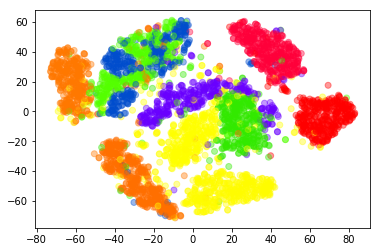

In [27]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30.0,learning_rate=200.0, n_iter=1000, n_iter_without_progress=300)
train_X_tsne = tsne.fit_transform(train_X_scaled, train_y)

plt.scatter(train_X_tsne[:,0], train_X_tsne[:,1], c=train_y.values,  cmap='prism', alpha=0.4)

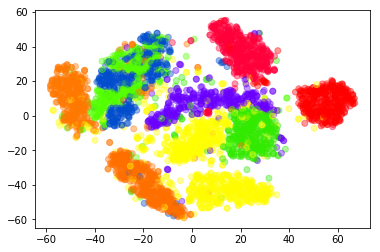

In [28]:
tsne = TSNE(n_components=2, random_state=0, perplexity=50.0,learning_rate=200.0, n_iter=1000, n_iter_without_progress=300)
train_X_tsne = tsne.fit_transform(train_X_scaled, train_y)

plt.scatter(train_X_tsne[:,0], train_X_tsne[:,1], c=train_y.values,  cmap='prism', alpha=0.4)

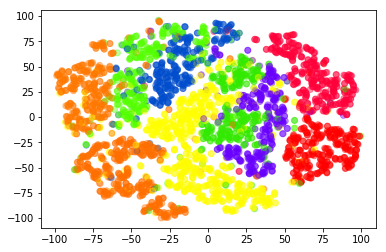

In [29]:
tsne = TSNE(n_components=2, random_state=0, perplexity=5.0,learning_rate=200.0, n_iter=1000, n_iter_without_progress=300)
train_X_tsne = tsne.fit_transform(train_X_scaled, train_y)

plt.scatter(train_X_tsne[:,0], train_X_tsne[:,1], c=train_y.values,  cmap='prism', alpha=0.4)

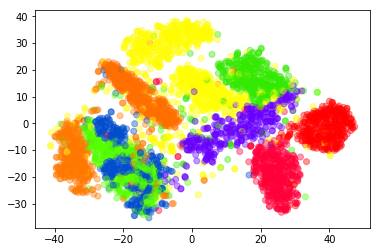

In [30]:
tsne = TSNE(n_components=2, random_state=0, perplexity=100.0,learning_rate=200.0, n_iter=1000, n_iter_without_progress=300)
train_X_tsne = tsne.fit_transform(train_X_scaled, train_y)

plt.scatter(train_X_tsne[:,0], train_X_tsne[:,1], c=train_y.values,  cmap='prism', alpha=0.4)

t-SNE does a good job in separating data points with 2 components. 
We cannot use this for transforming new data,
means it is not useful for classifying a different set of data.


Perplexity ensures the number of neighbours t-sne is preserving on the basis of distance metric.
Try perplexity value in the range of 5 to 50, as suggested in research paper.
Try multiple value of steps untill changes in cluster is saturated.
Distance between clusters may not be useful.
t-sne generally expands dense cluster and shrink sparse cluster.

t-SNE like many unsupervised learning algorithms often provide a means to an end, e.g. obtaining early insight on whether or not the data is separable, testing that it has some identifiable structure, and inspecting the nature of this structure. One does not need visualization of the t-SNE output to start answering some of these questions. 